In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

data = pd.read_csv('tmdb_5000_movies.csv')

data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
#Check duplicated record
sum(data.duplicated())

0

In [3]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
n = data.shape[0]

for i in range(0, n):
    # change genres
    genres = json.loads(data.iloc[i][1])
    s = ''
    for item in genres:
        genre = item['name']
        s+= genre + '|'
        if('genre_' + genre) not in data.columns:
            data['genre_' + genre] = pd.Series(0, data.index)
        data.set_value(col='genre_' + genre, index=i, value='1')
    data.set_value(col='genres', index=i, value=s[:-1])
    
    
    #change keywords
    keywords = json.loads(data.iloc[i][4])
    keyword = ''
    for item in keywords:
        keyword += item['name'] + '|'
    data.set_value(col='keywords', index=i, value=keyword[:-1])
    
    # production_companies
    pro_coms = json.loads(data.iloc[i][9])
    pro_com = ''
    for item in pro_coms:
        pro_com += item['name'] + '|'
    data.set_value(col='production_companies', index=i, value=pro_com[:-1])
    
    # production_countries
    pro_cous = json.loads(data.iloc[i][10])
    pro_cou = ''
    for item in pro_cous:
        pro_cou += item['name'] + '|'
    data.set_value(col='production_countries', index=i, value=pro_cou[:-1])
    
    # spoken_languages
    spk_lans = json.loads(data.iloc[i][14])
    spk_lan = ''
    for item in spk_lans:
        spk_lan += item['name'] + '|'
    data.set_value(col='spoken_languages', index=i, value=spk_lan[:-1])
    
    if(i == 4553):
        continue
    year = data.iloc[i][11].split('-')[0]
    data.set_value(col='release_year', index=i, value=year)

data.drop([4553],axis=0, inplace=True)

In [5]:
data.head(n=4500)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_Action,genre_Adventure,genre_Fantasy,genre_Science Fiction,release_year,genre_Crime,genre_Drama,genre_Thriller,genre_Animation,genre_Family,genre_Western,genre_Comedy,genre_Romance,genre_Horror,genre_Mystery,genre_History,genre_War,genre_Music,genre_Documentary,genre_Foreign,genre_TV Movie
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,English|Español,Released,Enter the World of Pandora.,Avatar,7.2,11800,1,1,1,1,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,1,1,0,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Français|English|Español|Italiano|Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466,1,1,0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1,0,0,0,2012,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,1,1,0,1,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,Columbia Pictures|Laura Ziskin Productions|Mar...,United States of America,2007-05-01,890871626,139.0,English|Français,Released,The battle within.,Spider-Man 3,5.9,3576,1,1,1,0,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,Walt Disney Pictures|Walt Disney Animation Stu...,United States of America,2010-11-24,591794936,100.0,English,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,0,0,0,0,2010,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,Marvel Studios|Prime Focus|Revolution Sun Studios,United States of America,2015-04-22,1405403694,141.0,English,Released,A New Age Has Come.,Avengers: Age of Ultro

In [6]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_Action,genre_Adventure,genre_Fantasy,genre_Science Fiction,genre_Crime,genre_Drama,genre_Thriller,genre_Animation,genre_Family,genre_Western,genre_Comedy,genre_Romance,genre_Horror,genre_Mystery,genre_History,genre_War,genre_Music,genre_Documentary,genre_Foreign,genre_TV Movie
count,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.00000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724,0.240317,0.164515,0.088297,0.111412,0.144940,0.478342,0.265306,0.048730,0.10683,0.017076,0.358601,0.186172,0.108080,0.072470,0.041025,0.029988,0.038526,0.022907,0.007080,0.001666
std,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268,0.427320,0.370781,0.283755,0.314674,0.352077,0.499583,0.441542,0.215325,0.30893,0.129569,0.479640,0.389286,0.310514,0.259291,0.198368,0.170571,0.192481,0.149623,0.083855,0.040787
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include=['O'])

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,release_year
count,4802,1712,4802,4802,4802,4799,4802,4802,4802,4802,4802,3959,4802,4802
unique,1175,1691,4222,37,4800,4799,3697,469,3280,529,3,3944,4799,90
top,Drama,http://www.missionimpossible.com/,,en,Batman,After Dick Harper loses his job at Globodyne i...,,United States of America,2006-01-01,English,Released,Based on a true story.,Out of the Blue,2009
freq,370,4,411,4504,2,1,350,2977,10,3171,4794,3,2,247


In [8]:
data.duplicated().sum()

0

In [9]:
data.to_csv('movie_clean.csv')

In [10]:
data.groupby('release_year').mean()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_Action,genre_Adventure,genre_Fantasy,genre_Science Fiction,genre_Crime,genre_Drama,genre_Thriller,genre_Animation,genre_Family,genre_Western,genre_Comedy,genre_Romance,genre_Horror,genre_Mystery,genre_History,genre_War,genre_Music,genre_Documentary,genre_Foreign,genre_TV Movie
release_year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,3.859070e+05,3059.000000,3.232447,8.394751e+06,197.000000,7.400000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1925,2.450000e+05,3060.000000,0.785744,2.200000e+07,151.000000,7.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1927,9.262000e+07,19.000000,32.351527,6.504220e+05,153.000000,8.000000,657.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1929,1.895000e+05,33054.000000,1.396524,2.179000e+06,104.500000,6.300000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
1930,3.950000e+06,22301.000000,8.484123,8.000000e+06,127.000000,6.100000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1932,4.000000e+00,22649.000000,1.199451,2.500000e+01,89.000000,6.200000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1933,3.195000e+05,23328.500000,1.278059,2.240500e+06,77.500000,5.600000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
1934,3.250000e+05,3078.000000,11.871424,4.500000e+06,105.000000,7.700000,275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1935,6.090000e+05,3080.000000,3.898498,3.202000e+06,101.000000,7.400000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


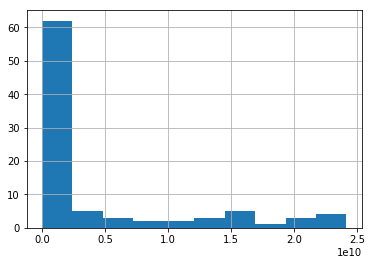

In [11]:
data.groupby('release_year').sum()['revenue'].hist()